# Project: IMBD movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project I will analyze the IMDB movies dataset, The dataset contains 21 columns each column has data that belong to movies

The questions I would like to answer:
  1. The relation between popularty and revenue?
  2. The relation between release year and vote?
  3. Number of movies for each genre?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import all packages I will use

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")

reading csv file.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


check the columns and data type of each column and mising value for each row.

### Data Cleaning: remove unnessery columns and fix the nan value

In [7]:
unnecessary_col =np.array(["homepage", 
                  "tagline",
                  "overview",
                  "cast",
                  "release_date",
                  "production_companies",
                  "imdb_id",
                 "vote_count",
                 "runtime",
                 "original_title",
                 "director",
                 "budget_adj",
                 "revenue_adj"])
df.drop(unnecessary_col,axis=1,inplace=True)

I will not use these columns to answer my questions.

In [8]:
df.duplicated().sum()

1

There one duplicate row in this dataset.

In [9]:
df.drop_duplicates(inplace=True)

Remove the duplicate rows.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   budget        10865 non-null  int64  
 3   revenue       10865 non-null  int64  
 4   keywords      9372 non-null   object 
 5   genres        10842 non-null  object 
 6   vote_average  10865 non-null  float64
 7   release_year  10865 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 763.9+ KB


Check the missing value each column

In [11]:
genres_null = df[df["genres"].isnull() == True]
genres_null.head()

,id,popularity,budget,revenue,keywords,genres,vote_average,release_year
424,363869,0.244648,0,0,NaN,NaN,6.1,2015
620,361043,0.129696,0,0,NaN,NaN,5.0,2015
997,287663,0.330431,0,0,NaN,NaN,6.8,2014
1712,21634,0.302095,0,0,NaN,NaN,7.4,2009
1897,40534,0.020701,0,0,duringcreditsstinger,NaN,7.0,2009


Query to find the missing value in **genres** column

I see the value 0 in both the **budget** and **revenue** columns, I will make query to find this mistake then I will fix it.

In [12]:
df.drop(genres_null.index,axis=0,inplace=True)

Remove rows with massing value in **genres** column.

In [13]:
budget_revenue_zero = df.query("budget == 0 and revenue == 0")
budget_revenue_zero.shape

(4679, 8)

Query to find the if **budget** and **revenue** value are 0.

In [14]:
df.drop(budget_revenue_zero.index,axis=0,inplace=True)

Remove rows if **budget** and **revenue** value are 0.

In [15]:
df.drop("keywords",axis=1,inplace=True)

Remove **keywords** column because they are a lot of missing value.

Unfortunately, I had a question about this column.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6163 non-null   int64  
 1   popularity    6163 non-null   float64
 2   budget        6163 non-null   int64  
 3   revenue       6163 non-null   int64  
 4   genres        6163 non-null   object 
 5   vote_average  6163 non-null   float64
 6   release_year  6163 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 385.2+ KB


Now the dataset are claen.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: The relation between voting average and revenue?

In [17]:
revenue = df.groupby("vote_average").mean()["revenue"]
revenue.head()

vote_average
1.5          0.0
2.1    9109322.0
2.2      73706.0
2.4          0.0
2.6          0.0
Name: revenue, dtype: float64

Qurey use groupby to group the **revenue** mean by **vote average**

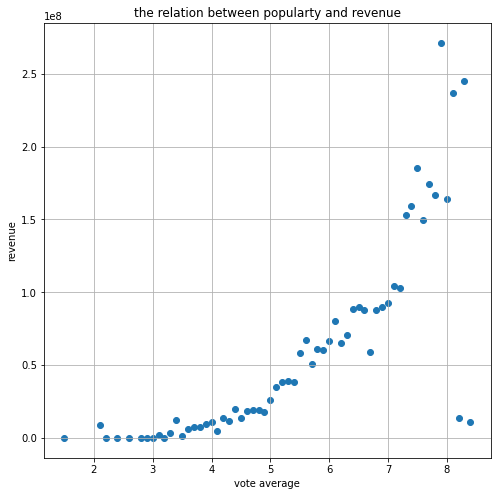

In [18]:
plt.subplots(figsize=(8, 8))
plt.scatter(x=revenue.index,y=revenue)
plt.title("the relation between popularty and revenue")
plt.xlabel("vote average")
plt.ylabel("revenue")
plt.grid(True);

The trend is increasing. When the average vote goes up, the revenue goes up.

There are two outlier in graph.

The values of the y-axis multiplied by 10<sup>8</sup>.

### Research Question 2: The relation between release year and vote average?

In [19]:
rating = df.groupby("release_year").mean()["vote_average"]
rating.head()

release_year
1960    6.827273
1961    6.615385
1962    6.587500
1963    6.566667
1964    6.825000
Name: vote_average, dtype: float64

Qurey use groupby to group the **vote average** mean by **release_year**

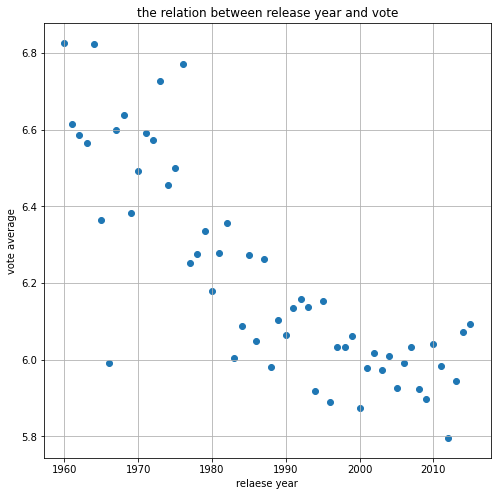

In [20]:
plt.subplots(figsize=(8, 8))
plt.scatter(rating.index,rating)
plt.title("the relation between release year and vote")
plt.xlabel("relaese year")
plt.ylabel("vote average")
plt.grid(True);

the trend is decreasing. the old movies takes vote average more than the new movies.

there are two outlier in graph.

### Research Question 3: Number of movies for each genre?

In [21]:
genres_df = df["genres"].str.split("|",expand=True)
genres_df.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


split strings in **genres** and put them in Dataframe

In [22]:
df0 = df.copy() 
df1 = df.copy() 
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

Take original DataFrame (df) copies of each column in the Dataframe above (genres_df)

In [23]:
df0["genres"] = genres_df[0] 
df1["genres"] = genres_df[1] 
df2["genres"] = genres_df[2]
df3["genres"] = genres_df[3]
df4["genres"] = genres_df[4]

Each Dataframe will replace "genres" column with column in Dataframe above (genres_df)

In [24]:
Number_df = df0.append(df1)
Number_df = Number_df.append(df2)
Number_df = Number_df.append(df3)
Number_df = Number_df.append(df4)
Number_df.shape

(30815, 7)

Combine all Dataframe together

In [25]:
Number_df.dropna(axis=0,inplace=True)
Number_df.shape

(15962, 7)

Remove all rows contain missing value

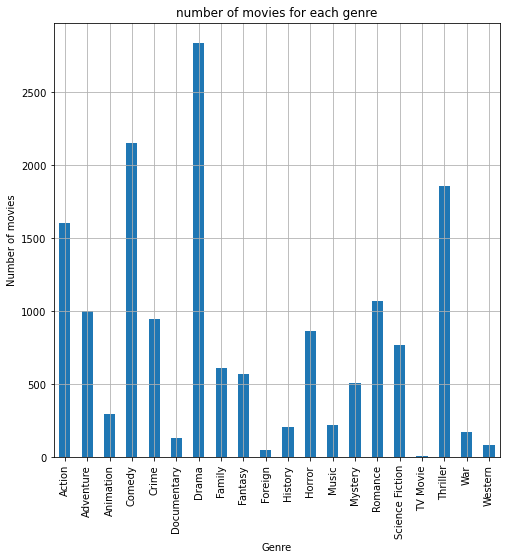

In [26]:
data = Number_df.groupby("genres").count()["id"]
plt.subplots(figsize=(8, 8))
data.plot(kind="bar")
plt.title("number of movies for each genre")
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.grid(True);

The most popular genre of movies is **drama** and the least popular is **TV Movie** and in this dataset there are 20 different genres.

**Drama** It is the popular genre because it is loved by viewers and makes good profits and needs a relatively small budget, and this is why movie makers prefer this genre over other genre such as **TV Movie**, **Action** and **Comedy** movies, **Action and Comedy** has an audience, but it needs a higher budget than drama, The chart below will prove it.

In [27]:
drama = Number_df[Number_df.genres == "Drama"]
Action = Number_df[Number_df.genres == "Action"]
Comedy = Number_df[Number_df.genres == "Comedy"]

Query for each genre

In [28]:
new_genres = drama
new_genres = new_genres.append(Comedy)
new_genres = new_genres.append(Action)
new_genres = new_genres.groupby("genres").mean()["budget"]
new_genres.head()

genres
Action    4.123713e+07
Comedy    2.342731e+07
Drama     1.995491e+07
Name: budget, dtype: float64

Combine qurey result then use groupby to group the **budget** mean by **genres**

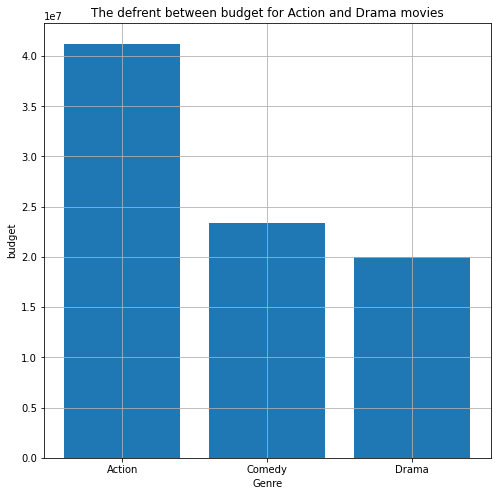

In [29]:
data = [new_genres.iloc[0],new_genres.iloc[1],new_genres.iloc[2]]
names = ["Action","Comedy","Drama"]
plt.subplots(figsize=(8, 8))
plt.bar(names, data)
plt.title("The defrent between budget for Action and Drama movies")
plt.xlabel("Genre")
plt.ylabel("budget")
plt.grid(True);

The values of the y-axis multiplied by 10<sup>7</sup>.

### Research Question 4: The year movies were released the most?

In [30]:
data = df.release_year

Extract the release year for each movie from the Dataframe (df)

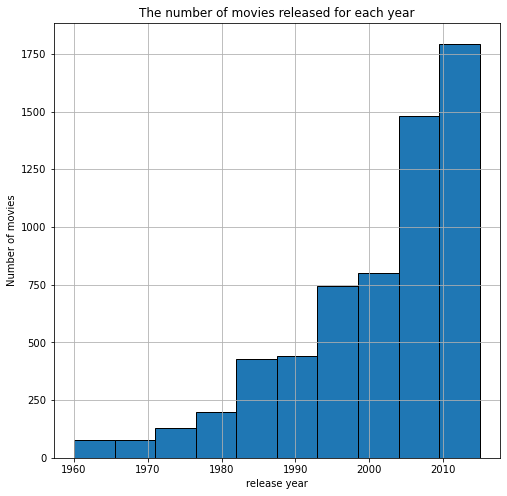

In [31]:
plt.subplots(figsize=(8, 8))
plt.hist(data, edgecolor="black")
plt.title("The number of movies released for each year")
plt.xlabel("release year")
plt.ylabel("Number of movies")
plt.grid(True);

This graph is skewed to the left and from 2010 to 2015, this is the highest period for movies released

<a id='conclusions'></a>
## Conclusions
Now the answer of the quation i but it in the beging:
1. The relation between voting average and revenue?
  - The revenue increace when the movie get high vote score
2. The relation between release year and vote average?
  - Movies fans love the old movies rather than new movies
3. Number of movies for each genre?
  - The most movie genre is drama because the budget lower than other  popular genre like **Comedy and action**, The movie makers are depends on the budget and How popular is the genre
4. The year movies were released the most?
  - The most period for movies released is from 2010 to 2015

The limitations:

**keyword** column have a lot of missing value I can not use it because I have to remove a lot of rows  